### Objectif du TP
> Le but du tp est de mettre en pratique un algorithme de clustering (K-means). Ici, il s'agira de regrouper les éléments du dataset en groupes, appelés clusters, afin de faire ressortir les patterns cachés dans le jeu de données en regroupant les éléments qui se ressemblent.

### Description du dataset
> ```fromage2.txt``` : Ensemble de différents fromages classifiés par leurs propriétés nutritives. Il s'agira donc d'identifier des groupes de fromages homogènes, ayant des caractéristiques similaires

### Étapes clés de l'analyse
- 1 : Chargement et description des données
- 2 : Standardisation
- 3 : Clustering en 4 groupes

## 1 - Chargement et description des données

In [4]:
# Définir le dossier
import os
os.chdir("/home/ubuntu/Documents/DATAMINING/")

> Ici on importe la librairie ```os``` qui permet d'effectuer des opérations courantes liées au système d'exploitation. Ainsi on pourra pointer sur le dossier voulu.

In [52]:
# Chargement des données
import pandas
D = pandas.read_table("fromage2.txt",sep="\t",header=0,index_col=0)
D.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, CarredelEst to Yaourtlaitent.nat.
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   calories     29 non-null     int64  
 1   sodium       29 non-null     float64
 2   calcium      29 non-null     float64
 3   lipides      29 non-null     float64
 4   retinol      29 non-null     float64
 5   folates      29 non-null     float64
 6   proteines    29 non-null     float64
 7   cholesterol  29 non-null     int64  
 8   magnesium    29 non-null     int64  
dtypes: float64(6), int64(3)
memory usage: 2.3+ KB


> Ici on importe la librairie ```pandas``` qui permet la manipulation et l'analyse des données. Ce qui nous permet de lire fichier texte ```fromage.txt```

In [53]:
# Premières lignes
D.head()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


<AxesSubplot:xlabel='lipides', ylabel='proteines'>

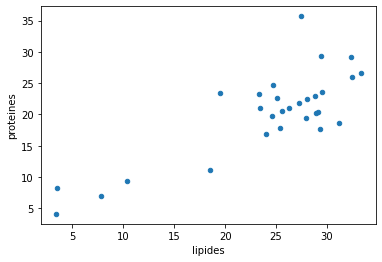

In [7]:
# Nuage de points entre les protéines et les lipides
D.plot(x="lipides", y="proteines", kind="scatter")

<AxesSubplot:xlabel='lipides', ylabel='cholesterol'>

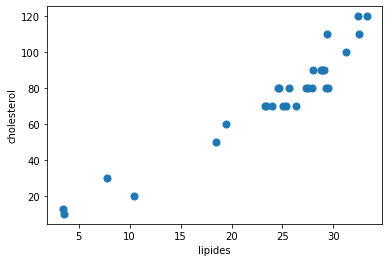

In [67]:
# Nuage de points entre les protéines et les cholesterols
D.plot(x="lipides", y="cholesterol", kind="scatter", s=50)

> Ici on utilise la méthode ```plot()``` de la librairie ```pandas``` qui permet de tracer des courbes qui relient des points dont les abscisses et ordonnées sont sélectionnées au préalable.

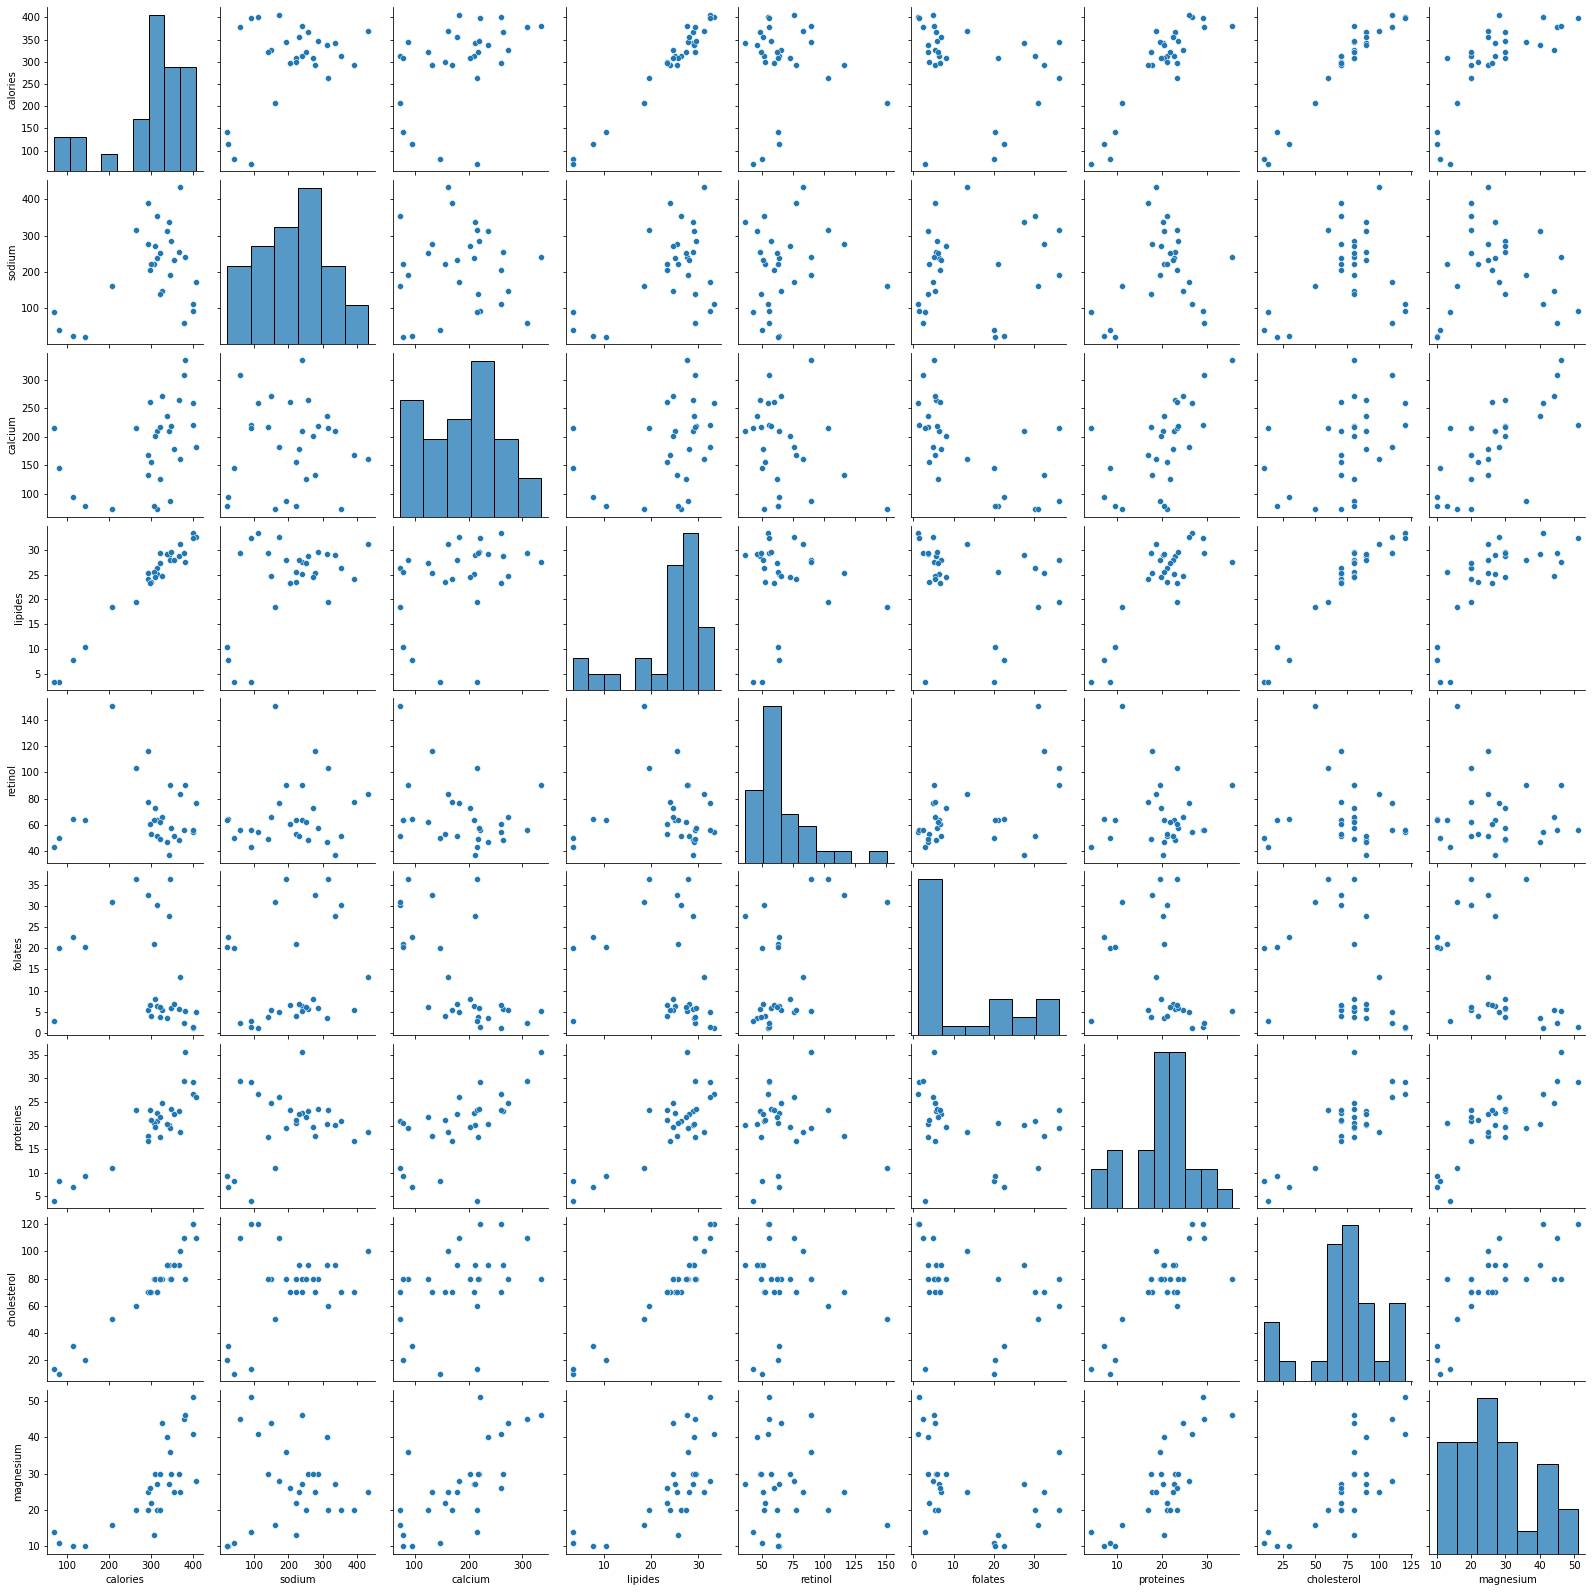

In [68]:
# Nuage par paire
import seaborn as sns
sns.pairplot(D)

> Ici on importe la librairie ```seaborn``` qui est une bibliothèque de visualisation de données Python basée sur matplotlib . Il fournit une interface de haut niveau pour dessiner des graphiques statistiques attrayants et informatifs. On fait appel ensuite à la méthode ```pairplot()``` qui permet de tracer des relations par paires dans un ensemble de données.

### Interprétation du graphique :
<em>Ici on peut constater des corrélations potentielles : </em>
- Protéines - Lipides
- Protéines - Calcium 
- Calories &nbsp;&nbsp;- Lipdes 
- etc...

> <strong>Remarque</strong> : On peut voir que des groupes semblent apparaître naturellement. C'est ce que tentera de démontrer la suite du code.

## 2 - Standardisation

<strong>Objectif de la standardisation</strong> : <br>
Il est recommandé de normaliser les données, cela permettra par la suite de déterminer plus facilement les clusters (groupes) grâce aux k-means (moyennes) 

In [69]:
# Moyennes par variable
D.mean(axis=0)

calories       300.034483
sodium         210.086207
calcium        185.734483
lipides         24.158621
retinol         67.562069
folates         13.010345
proteines       20.168966
cholesterol     74.586207
magnesium       26.965517
dtype: float64

In [70]:
# Écarts-type par variable
D.std(axis=0)

calories        91.914356
sodium         108.678923
calcium         72.528882
lipides          8.129642
retinol         24.163098
folates         11.723339
proteines        6.959788
cholesterol     28.245755
magnesium       11.318388
dtype: float64

In [71]:
# Standardisation
Z = (D - D.mean(axis=0)) / D.std(axis=0)
print(Z)

                    calories    sodium   calcium   lipides   retinol  \
Fromages                                                               
CarredelEst         0.151941  1.319610 -1.559854  0.263404 -0.660597   
Babybel             0.151941  0.256846  0.331806  0.115796 -0.159833   
Beaufort            1.098474 -0.902532  1.015671  1.124450 -0.524025   
Bleu                0.456572  1.158585  0.349730  0.583221 -1.260686   
Camembert          -0.392044  0.956154  0.415910 -0.573041  1.466614   
Cantal              0.728564  0.422472  1.079094  0.570920 -0.776476   
Chabichou           0.478331 -0.166419 -1.358555  0.460215  0.932742   
Chaource           -0.087413  0.606500 -0.728461  0.152698  2.021178   
Cheddar             1.152872 -0.350447 -0.047353  1.026045  0.365762   
Comte               1.076714 -1.086560  0.479333  1.013744 -0.482640   
Coulomniers         0.086662  0.109624 -1.468856  0.177299 -0.163972   
Edam                0.293377 -0.571281  1.192153  0.066593 -0.07

In [72]:
# Vérification de la standardisation - moyennes
Z.mean(axis=0)

calories      -7.656711e-17
sodium         1.071939e-16
calcium        4.689735e-16
lipides        3.368953e-16
retinol        3.828355e-17
folates       -2.679849e-17
proteines      9.188053e-17
cholesterol   -1.990745e-16
magnesium      9.953724e-17
dtype: float64

In [73]:
# Vérification - écarts-type
Z.std(axis=0)

calories       1.0
sodium         1.0
calcium        1.0
lipides        1.0
retinol        1.0
folates        1.0
proteines      1.0
cholesterol    1.0
magnesium      1.0
dtype: float64

## 3 - Clustering en quatre groupes

In [48]:
# K-means avec 4 groupes
from sklearn import cluster

res = cluster.KMeans(n_clusters=4)


> Ici on créé le modèle avec le nombre de clusters que l'on veut avoir grâce à la méthode ```KMeans()```. 

<u><em>Paramètres de la méthode : </em></u>
- <strong>n_clusters :</strong> permet de définir le nombre de clusters désirés. Nous choisirons 4 clusters
- <strong>n_init :</strong> permet de définir le nombre d'initalisation que l'on veut avoir, c'est à dire le nombre de fois que l'algorithme sera exécuté. Par défaut le nombre est fixé à 10
- <strong>max_iter :</strong> permet de définir le nombre d'itérations max. Par défaut le nimbre est fixé à 300
- <strong>init :</strong> permet de choisir la stratégie d'initialisation qui sera utilisée. Par défaut c'est la méthode K-Means++  qui est paramétrée, qui est une méthode d'initialisation qui consiste à placer les centroids sur des points du dataset les uns les autres, ce qui facilitera la convergence des centroids vers des positions d'équilibre

In [49]:
res.fit(Z)

KMeans(n_clusters=4)

> Ici on utilise la méthode ```fit()``` qui permettra d'entraîner le dataset 

> Ici la méthode ```pedict()``` permettra de voir comment sont classés les échantillons

In [75]:
# num de cluster affectés aux groupes
res.labels_

array([0, 1, 3, 1, 1, 1, 0, 0, 1, 3, 0, 3, 3, 2, 0, 2, 2, 1, 1, 3, 2, 0,
       1, 1, 0, 1, 0, 1, 2], dtype=int32)

In [76]:
# Éffectifs par groupe
import numpy
numpy.unique(res.labels_, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([ 8, 11,  5,  5]))

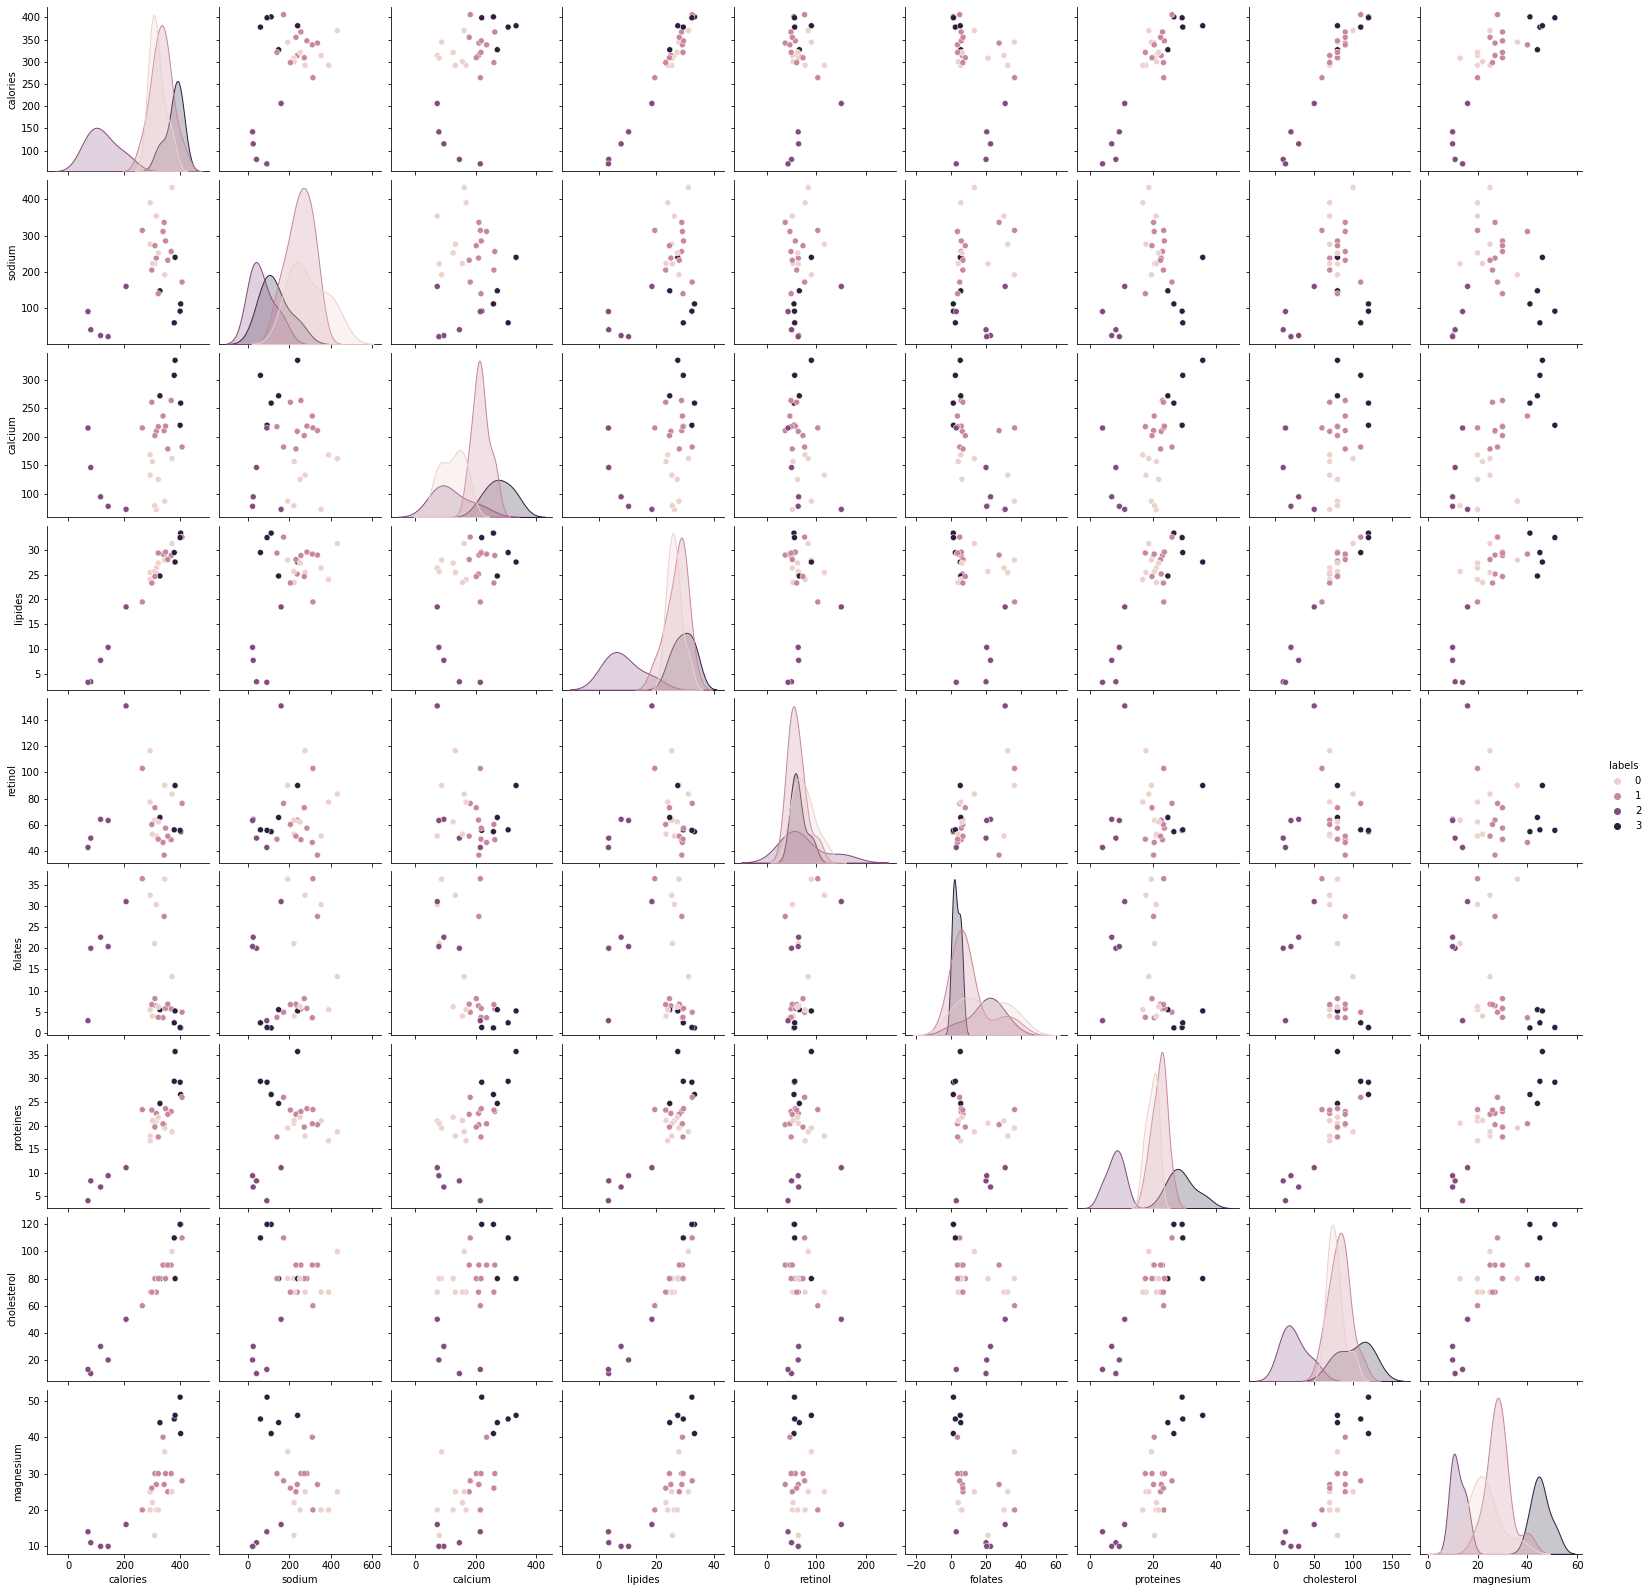

In [77]:
# Rajouter la variable au data-frame initial
B = D.copy()
B['labels'] = res.labels_
# Configuration des points dans le plan
# Des variables prises par paires
sns.pairplot(B,hue="labels")

### Interprétation du graphique :
<em>Ici on peut constater visuellement les quatre clusters déterminés plus haut. Ce type de visualisation facilite grandement l'interprétation des données.</em>

<hr>

In [80]:
# Moyennes par groupe
gb = D.groupby(res.labels_)
# Éffectifs par classe
gb.size()

0     8
1    11
2     5
3     5
dtype: int64

> Ici on peut voir le nombre total de fromage par cluster

<hr>

In [79]:
# Moyennes par classe
gb.mean()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,317.625000,292.5625,123.075000,26.387500,74.737500,18.650000,19.650000,77.500000,22.625000
1,332.818182,251.0000,218.090909,27.145455,60.681818,10.509091,22.018182,82.727273,28.454545
2,122.600000,67.8000,121.560000,8.720000,74.220000,19.380000,7.980000,24.600000,12.200000
3,377.200000,130.4000,278.980000,29.460000,64.560000,3.120000,29.120000,102.000000,45.400000


> Ici on peut voir la moyenne de chaque nutriment pour chaque cluster.